## Student No. 2403967


# Deep Learning 2023 - Coursework
## Classifying Plankton!

The aim of this coursework will be for you to design a deep learning architecture to predict identify plankton species from images. 

***Your aim is to design a model that, when given a new image of a plankton speciment would return to which species it belongs to.***

You are free to use any architecture you prefer, from what we have seen in class. You can decide to use unsupervised pre-training of only supervised end-to-end training - the approach you choose is your choice. 

### Hand-in date: Thursday 16th of March before 4:30pm (on Moodle)

### Steps & Hints
* First, look at the data. What are the different classes? How different are they? What type of transformations for your data augmentation do you think would be acceptable here?. 
* You will note that it is *very* imbalanced (large differences in number of samples between classes) --- this will be one challenge to look for. 
* Also, note that the dataset is rather small (hint: you will need to think about data augmentation!). 
* Second, try and load the data and separate into training, validation and test set (or better, use cross-validation)
* Write a DataLoader class for the data (Hint: you will want to put the data augmentation in the data loader). 
* Think about pre-processing of the input? The output? Normalisation or not? Data augmentation? Which one? 
* Design a network for the task. What layers? How many? Do you want to use an Autoencoder for unsupervised pre-training? 
* Choose a loss function for your network
* Select optimiser and training parameters (batch size, learning rate)
* Optimise your model, and tune hyperparameters (especially learning rate, momentum etc)
* Analyse the results on the test data. How to measure success? Which classes are recognised well, which are not? Is there confusion between some classes? Look at failure cases. 
* If time allows, go back to drawing board and try a more complex, or better, model. 
* Explain your thought process, justify your choices and discuss the results!

### Submission
* submit TWO files on Moodle: 
  * **your notebook**: use `File -> download .ipynb` to download the notebook file locally from colab. 
  * **a PDF file** of your notebook's output as you see it: use `File -> print` to generate a PDF. 
* your notebook must clearly contains separate cells for: 
  * setting up your model and data loader
  * training your model from data
  * loading your pretrained model (eg, from github/gitlab)
  * testing your model on test data. 
* The training cells must be disabled by a flag, such that when running *run all* on your notebook it does
  * load the data
  * load your model 
  * apply the model to the test data
  * analyse and display the results and accuracy 
* In addition provide markup cell:
  * containing your student number at the top
  * to describe and motivate your design choices: architecture, pre-processing, training regime
  * to analyse, describe and comment on your results
  * to provide some discussion on what you think are the limitations of your solution and what could be future work

* **Note that you must put your trained model on a github so that your code can download it.**


### Assessment criteria 
* In order to get a pass mark, you will need to demonstrate that you have designed and trained a deep NN to solve the problem, using sensible approach and reasonable efforts to tune hyper-parameters. You have analysed the results. It is NOT necessary to have any level of accuracy (a network that predicts poorly will always yield a pass mark if it is designed, tuned and analysed sensibly). 
* In order to get a good mark, you will show good understanding of the approach and provide a working solution. 
* in order to get a high mark, you will demonstrate a working approach of gradual improvement between different versions of your solution. 
* bonus marks for attempting something original if well motivated - even if it does not yield increased performance. 
* bonus marks for getting high performance, and some more points are to grab for getting the best performance in the class. 

### Notes
* make sure to clearly set aside training, validation and test sets to ensure proper setting of all hyperparameters. 
* I recommend to start with small models that can be easier to train to set a baseline performance before attempting more complex one. 
* Be mindful of the time!

### Data 
The following cells will show you how to download the data and view it. 

In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import collections
import pandas as pd
import torch.optim as optim
from  torch.utils.data import WeightedRandomSampler
import torchvision.transforms as T

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from torch.utils.data import random_split
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset


from tqdm import tqdm
from sklearn.model_selection import train_test_split
import plotly.express as px
from IPython.display import Image

# Loading the data
# we will use wget to get the archive
!wget --no-check-certificate "https://www.dropbox.com/s/v2udcnt98miwwrq/plankton.pt?dl=1" -O plankton.pt

--2023-03-16 20:26:20--  https://www.dropbox.com/s/v2udcnt98miwwrq/plankton.pt?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/v2udcnt98miwwrq/plankton.pt [following]
--2023-03-16 20:26:21--  https://www.dropbox.com/s/dl/v2udcnt98miwwrq/plankton.pt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb302bfc62af77ba6e84baa54a2.dl.dropboxusercontent.com/cd/0/get/B4X4foEKWyy3vS8gVxTZ73xUurwTbCqxws1SJWLRTADRPmHqSzaeMTymsN2kQWkNZS9SHpPn3Prm9E0pNi7zCYsFLp8X8jZVI3HsifUL9KFTyFk3e7gANGjNm4MdBQR4lk898Sxf9EOwLCOGi_YUBMRhzRSLPsc4rf0O8Ni5aq1s4Q/file?dl=1# [following]
--2023-03-16 20:26:21--  https://ucb302bfc62af77ba6e84baa54a2.dl.dropboxusercontent.com/cd/0/get/B4X4foEKWyy3vS8gVxTZ73xUurwTbCqxws1SJWLRTADRPmHqSzaeMTymsN2kQWkNZS9SHpPn3Prm9E0pN

In [2]:
!git clone https://github.com/buttsaad909/Deeplearning.git

fatal: destination path 'Deeplearning' already exists and is not an empty directory.


The classes in this dataset are: 
tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

And the numbers of examples per class are: 
2.0     257
8.0     235
7.0     219
10.0    157
11.0    135
0.0     134
3.0     110
6.0      92
9.0      76
4.0      70
5.0      67
1.0      65
dtype: int64


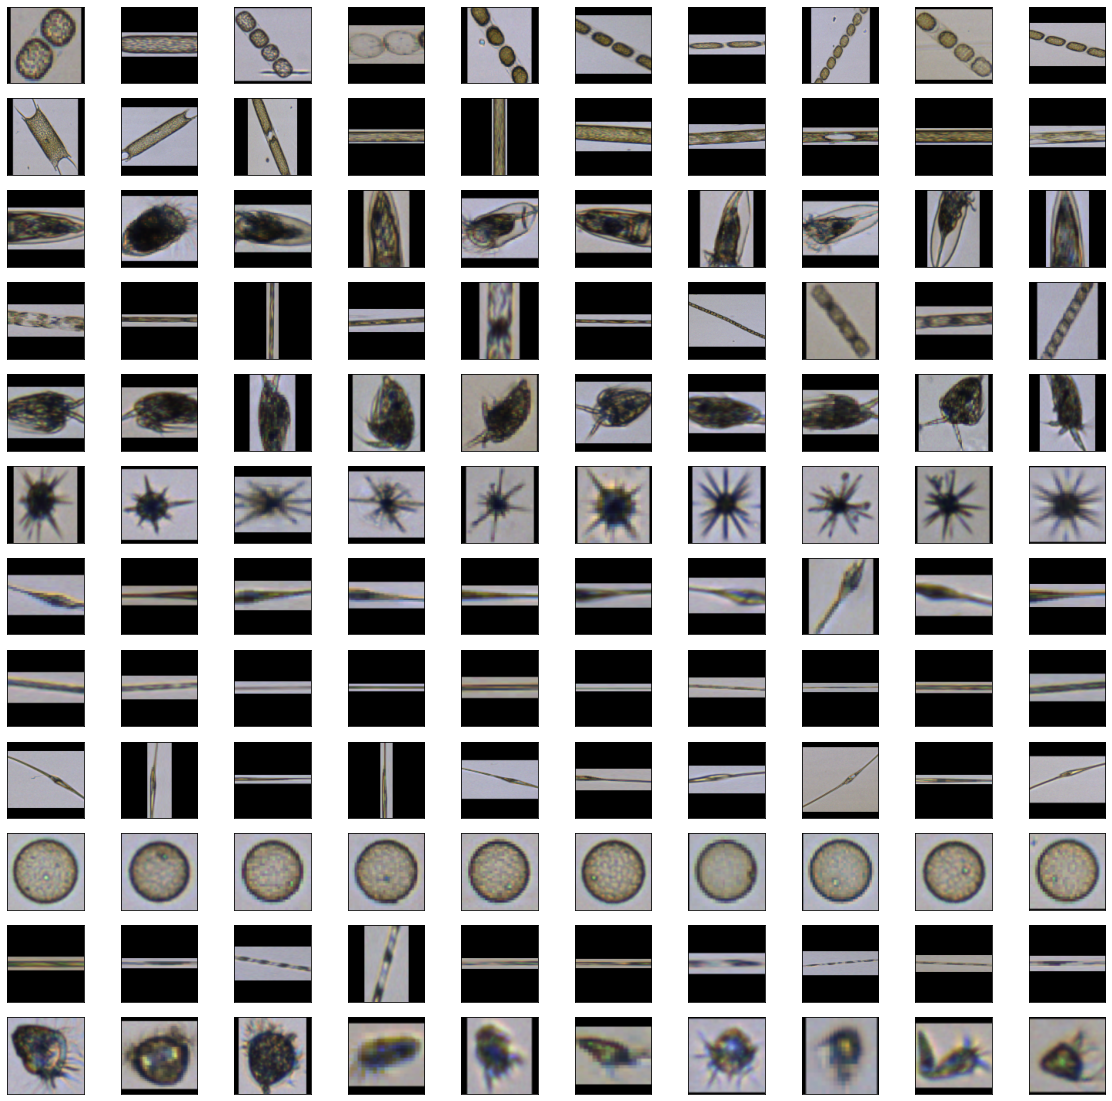

In [3]:
data = torch.load('plankton.pt')

# make sure you use the GPU (btw check your runtime is a GPU in colab)
use_cuda = True
device = torch.device("cuda" if (use_cuda and torch.cuda.is_available()) else "cpu")
torch.manual_seed(1)

# get the number of different classes
classes = data['labels'].unique()
nclasses = len(classes)
print('The classes in this dataset are: ')
print(classes)

# display the number of instances per class: 
print('\nAnd the numbers of examples per class are: ')
print( pd.Series(data['labels']).value_counts() )

# we now print some examples from each class for visualisation
fig = plt.figure(figsize=(20,20))

n = 10 # number of examples to show per class

for i in range(nclasses): 
  idx = data['labels'] == classes[i]
  imgs = data['images'][idx,...]
  for j in range(n):
    ax = plt.subplot(nclasses,n,i*n+j+1)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.imshow( imgs[j,...].permute(1, 2, 0) ) # note the permute because tensorflow puts the channel as the first dimension whereas matplotlib expects WxHx3
plt.show()


# Augmentation

Due to a small size of the dataset, I wasn't able to produce desireable results by using the default dataset. The maximum accuracy that I could achieve was from a range of 25-35%. Upon doing data augmentation, I was able to improve the accuracy results massively by augmenting the dataset to train the model. 

Every image in the dataset was flipped horizontally and vertically and as well parts of it removed and as randomly rotated three times (each). The result of this augmentation resulted in producing results of the model to 91% from somewhere around 25% earlier. The size of the dataset increased from 1617 to 14553 which shows the impact of the augmentation process.

In [4]:
length_images = len(data['images'])

augmentation = {}
augmentation["images"] = list()
augmentation["labels"] = list()

for i in range(length_images):

    for j in range(9):
      augmentation["labels"].append(data['labels'][i])

    image_tensor = data['images'][i]
    augmentation["images"].append(image_tensor)

    policy = T.Compose([T.ToPILImage(), T.ToTensor(), T.RandomVerticalFlip(p=1.0)])
    augmentation["images"].append(policy(image_tensor))
    
    policy = T.Compose([T.ToPILImage(), T.ToTensor(), T.RandomHorizontalFlip(p=1.0)])
    augmentation["images"].append(policy(image_tensor))

    policy = T.Compose([T.ToPILImage(), T.ToTensor(), T.RandomErasing(p=1.0)])
    augmentation["images"].append(policy(image_tensor))
    augmentation["images"].append(policy(image_tensor))
    augmentation["images"].append(policy(image_tensor))

    policy = T.Compose([T.ToPILImage(), T.ToTensor(), T.transforms.RandomRotation((0,360))])
    augmentation["images"].append(policy(image_tensor))
    augmentation["images"].append(policy(image_tensor))
    augmentation["images"].append(policy(image_tensor))
    
augmentation['images'] = torch.stack(augmentation['images'])
augmentation['labels'] = torch.stack(augmentation['labels'])

print("Augmented Data Size Images:", len(augmentation['images']))
print("Augmented Data Size Labels:", len(augmentation['labels']))

Augmented Data Size Images: 14553
Augmented Data Size Labels: 14553


## Simple splitting of the augmented dataset by using train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(augmentation['images'], augmentation['labels'], stratify=augmentation['labels'], test_size=0.2, random_state=1)

print(X_train.shape)
print(X_test.shape)

torch.Size([11642, 3, 100, 100])
torch.Size([2911, 3, 100, 100])


## Used WeightedRandomSampler to deal with the imbalance in my dataset

In [6]:
class CustomDataset(torch.utils.data.Dataset):

   def __init__(self, images, labels):
    self.images = images
    self.labels = labels.to(torch.int64)
    self.transform = policy

   def __len__(self):
    return len(self.images)

   def __getitem__(self, idx):
    images = self.images[idx]
    labels = self.labels[idx]

    return images, labels

In [7]:
weights_assigned = 1. / pd.Series(y_train.numpy()).groupby(y_train.numpy()).count().to_numpy()

WeightedSampler = WeightedRandomSampler(torch.from_numpy(np.array([weights_assigned[ind] for ind in y_train.numpy().astype(int)])), 
                                len(torch.from_numpy(np.array([weights_assigned[ind] for ind in y_train.numpy().astype(int)]))))

trainloader = DataLoader(CustomDataset(X_train, y_train), sampler = WeightedSampler, batch_size=64)

testloader = DataLoader(CustomDataset(X_test, y_test), shuffle=True, batch_size=64)

# The CNN Model

The CNN model designed below is a classical neural network what has four convolutional layers followed by a batch normalization later, ReLU activation function and a max_pooling opeartion.

The result of these layers is then flattened and passed through, followed by a ReLU function.

At the end, the output is passed through a log softmax activation function to get the class probabilites.

In [8]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, padding=1, stride=1, kernel_size=3)
        self.norm1 = nn.BatchNorm2d(16)
        self.fc1 = nn.Linear(128*6*6, 512)
        self.conv2 = nn.Conv2d(16, 32, padding=1, stride=1, kernel_size=3)
        self.norm2 = nn.BatchNorm2d(32)
        self.fc2 = nn.Linear(512, 64)
        self.conv3 = nn.Conv2d(32, 64, padding=1, stride=1, kernel_size=3)
        self.norm3 = nn.BatchNorm2d(64)
        self.fc3 = nn.Linear(64, 32)
        self.conv4 = nn.Conv2d(64, 128, padding=1, stride=1, kernel_size=3)
        self.norm4 = nn.BatchNorm2d(128)
        self.fc4 = nn.Linear(32, 12)
        
    def forward(self, x):
        x = nn.functional.relu(self.conv1(x))
        x = self.norm1(x)
        x = nn.functional.max_pool2d(x,2,2)
        x = nn.functional.relu(self.conv2(x))
        x = self.norm2(x)
        x = nn.functional.max_pool2d(x,2,2)
        x = nn.functional.relu(self.conv3(x))
        x = self.norm3(x)
        x = nn.functional.max_pool2d(x,2,2)
        x = nn.functional.relu(self.conv4(x))
        x = self.norm4(x)
        x = nn.functional.max_pool2d(x,2,2)
        x = torch.flatten(x, 1)
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = nn.functional.relu(self.fc3(x))
        x = nn.functional.relu(self.fc4(x))
        x = nn.functional.log_softmax(x, dim=-1)
        
        return x

## Training

The training line code is commented out!

In [9]:
def training_loop(n_epochs, optimizer, model, device, loss_fn, train_loader):
    model = model.to(device)
    for epoch in range(1, n_epochs + 1):
        loss_train = 0.0
        for imgs, labels in train_loader:
            outputs = model(imgs.to(device))
            loss = loss_fn(outputs, labels.to(device))
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            loss_train += loss.item()
            
        if epoch == 1 or epoch % 1 == 0:
            print(f"Epoch: {epoch}, Training Loss: {loss_train}")
    
    torch.save(model.state_dict(), "CNN_model.pt")

In [10]:
CNN_model = CNN()

n_epochs = 100
optimizer = optim.Adam(CNN_model.parameters(), lr=0.001, weight_decay = 0.0001)
loss_fn = nn.CrossEntropyLoss()

#training_loop(n_epochs, optimizer, CNN_model, device, loss_fn, train_loader = trainloader,)

## Testing

The model produces 91% on the test set, which is something I am happy with.

In [11]:
def test_loop(model, device, test_loader):
  
    model.eval()
    model = model.to(device)
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += nn.functional.nll_loss(output, target, reduction='sum').item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
            
    test_loss /= len(test_loader.dataset)
    
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [12]:
CNN_model = CNN()
CNN_model.load_state_dict(torch.load("Deeplearning/CNN_model.pt"))
test_loop(CNN_model, device, test_loader = testloader)


Test set: Average loss: 0.4304, Accuracy: 2636/2911 (91%)



# Design Choices



*   Upon building a basic two layer convolutional neural network, followed by max pooling and then followed by two fully connected linear layers. By using this architecture and using un-augmented dataset, the accuracy that I achieved ranged from 25-35%.
*   After that, I performed data augmentation where I flipped, rotated and removed some pieces from the data which helped to imporove the accuracy to more than 60%.
*   Upon seeing improvements, I added 2 more layers of convolutional network, used batch normalization, and used ReLU activation functions which bumped by the accuracy to 80+%.
*   Finally, I hypertuned the parameter for learning rate, weighted decay and n_epochs to settle for 0.001 for learning decay, 0.0001 weight_decay and n_epochs for 100 to get the 91% accuracy.

